 Apprentice Chef Inc data analysis

# Exploratory data analysis <br> & <br>
# Feature treatment and engineering

In [27]:
#%%timeit 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt# essential graphical 
import seaborn as sns # enhanced graphical 
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# nameing the file name as per assignment description
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# creating a copy with my preferred short name
chef = original_df.copy()
chef

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0


In [2]:
# loading the dictionary for more reference
chef_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')
chef_description

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...
2,NAME,string,Full name of customer (collected upon initial ...
3,EMAIL,string,Email of customer (collected upon initial regi...
4,FIRST_NAME,string,First name of customer (collected upon initial...
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...


In [3]:
#to check how the data looks like at a glance
chef.head(n=10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253
5,1250.0,1,Aegor Rivers,aegor.rivers@gmail.com,Aegor,Rivers,57,4,6,2,84.21,1,0,0,1,5,1,10,2,5,0,0,70,91.2,3,1,2,17,0
6,4665.0,1,Aelinor Penrose,aelinor.penrose@homedepot.com,Aelinor,Penrose,106,3,10,8,110.00,1,3,0,0,6,2,7,0,3,0,0,70,263.3,6,2,4,10,705
7,1690.0,1,Aemma Arryn,aemma.arryn@yahoo.com,Aemma,Arryn,122,6,8,10,92.73,1,1,0,1,5,1,8,0,3,0,0,70,160.0,5,1,3,13,0
8,1710.0,1,Aemon Rivers,aemon.rivers@caterpillar.com,Aemon,Rivers,46,4,5,10,170.47,1,0,0,1,6,2,8,4,10,1,1,70,170.1,4,2,3,12,0
9,1770.0,1,Aggar,aggar@protonmail.com,Aggar,Aggar,58,4,6,5,79.58,1,0,1,1,6,2,2,3,7,1,1,90,191.3,7,1,3,12,0


In [4]:
print(chef.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [5]:
chef.iloc[:,1:].describe()

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


In [6]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [7]:
chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

I can impute the missing values for family names with strategies like imputation based on first name; it is good to impute because it would increase training model efficiency.
Although I am not sure about the impact on my model, I will impute it as unknown.

In [2]:
chef['FAMILY_NAME']= chef['FAMILY_NAME'].fillna('Unknown')
#checking for final missing value treatment
chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In the following base simple regression model, we can see the regression for variables and revenue. 
I have kept one variable as an example to show how uninformative this could be before 
feature engineering and based on a primitive model, this is not giving much information.

* However, to get more sense of data, we could run the regression one by one. This could help in order to form variables that has higher Rsq for a better model in future steps
* Possibly, the low ones could be removed in the model too 

In [9]:

# building a base model for variables individually 

# a model type
lm_rev_unique = smf.ols(formula = """REVENUE ~ chef['CROSS_SELL_SUCCESS']""",
                        data = chef)


# telling Python to run the data through the blueprint
results = lm_rev_unique.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04008
Date:                Wed, 11 Mar 2020   Prob (F-statistic):              0.841
Time:                        18:11:30   Log-Likelihood:                -16455.
No. Observations:                1946   AIC:                         3.291e+04
Df Residuals:                    1944   BIC:                         3.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [10]:
#without doing all simple regressions, we can have correlations here
chef_corr = chef.corr().round(2)

print(chef_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
AVG_PREP_VID_TIME               0.64
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
TOTAL_PHOTOS_VIEWED             0.47
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
AVG_TIME_PER_SITE_VISIT         0.14
CONTACTS_W_CUSTOMER_SERVICE     0.10
MOBILE_NUMBER                   0.03
PRODUCT_CATEGORIES_VIEWED       0.03
PC_LOGINS                       0.02
WEEKLY_PLAN                     0.01
TASTES_AND_PREFERENCES          0.01
CANCELLATIONS_BEFORE_NOON       0.01
REFRIGERATED_LOCKER            -0.00
EARLY_DELIVERIES               -0.00
CROSS_SELL_SUCCESS              0.00
PACKAGE_LOCKER                 -0.01
LATE_DELIVERIES                -0.01
MOBILE_LOGINS                  -0.02
FOLLOWED_RECOMMENDATIONS_PCT   -0.02
CANCELLATIONS_AFTER_NOON       -0.04
UNIQUE_MEALS_PURCH             -0.06
AVG_CLICKS_PER_VISIT           -0.55
Name: REVENUE, dtype: float64


Based on some research on the topic, apparently web traffic and analytics matters as well as a few product oriented variables. <b>
    _So, I will define variables that are more describing revenue._

In [3]:
#define variables based on how customers spend time on website
chef['time_spent_web']= chef['AVG_PREP_VID_TIME']/chef['AVG_TIME_PER_SITE_VISIT']

In [4]:
#define new variable to understand to what level customers are willing to try new things!
chef['try_new']= chef['UNIQUE_MEALS_PURCH']/chef['TOTAL_MEALS_ORDERED']


In [5]:
#define a new variable that gives us a proportion to size of meals
chef['order_size']= chef['LARGEST_ORDER_SIZE']/chef['TOTAL_MEALS_ORDERED']

In [6]:
#define a variable that goes through how unsatisfied they were based on contacts on contacts
chef['satisfy']= chef['TOTAL_MEALS_ORDERED']/chef['CONTACTS_W_CUSTOMER_SERVICE']


In [7]:
# ratio of total meals and cancellations after noon because we fully refund
chef['cancel']= chef['CANCELLATIONS_BEFORE_NOON']/chef['TOTAL_MEALS_ORDERED']


In [8]:
#defining variable to see how ratings led to cancellations
chef['rate_result'] = chef['MEDIAN_MEAL_RATING']*(chef['CANCELLATIONS_AFTER_NOON']+chef['CANCELLATIONS_BEFORE_NOON'])

In [9]:
# defining a new variable for total logins
chef['login_total'] = chef['MOBILE_LOGINS']+chef['PC_LOGINS']

In [10]:
#defining a variable to see how successful the promotion plan has been
chef['promo']=chef['TOTAL_MEALS_ORDERED']*chef['CROSS_SELL_SUCCESS']

*For instance:*\
Low ones that are interesting to consider :Early deliveries,
High ones to consider : Median meal rating\*

Before we proceed, a heatmap is also helping in the same way that simple regression model did; but in an easier way. I will get some hints from that regarding possible noise that I might want to remove.

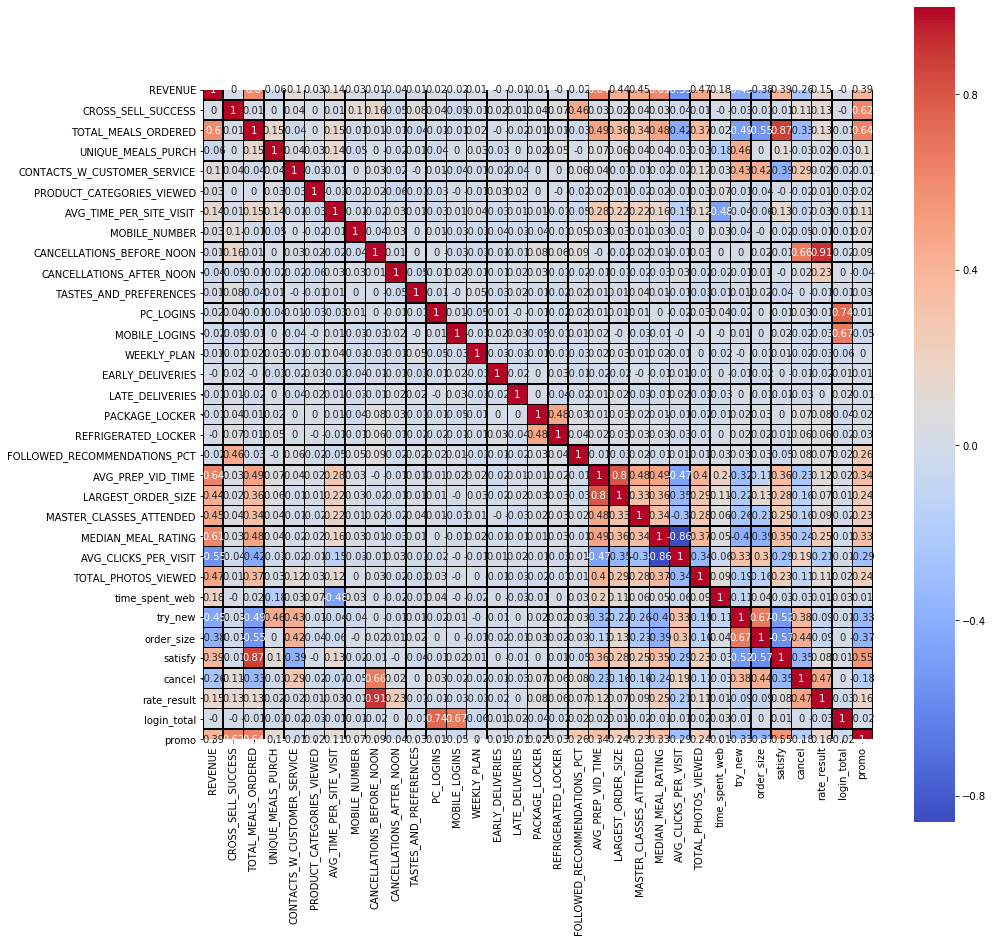

In [19]:
#plotting the heatmap
chef_corr = chef.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(chef_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()

In [20]:
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'time_spent_web', 'try_new', 'order_size', 'satisfy', 'cancel', 'rate_result', 'login_total', 'promo'], dtype='object')

In [21]:
#to use the list for a for loop to plot
chef_plot=['REVENUE','CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
           'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
           'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
           'MOBILE_LOGINS', 'WEEKLY_PLAN', 
               'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
           'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME',
           'LARGEST_ORDER_SIZE',
           'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
           'TOTAL_PHOTOS_VIEWED', 'try_new','time_spent_web','order_size','satisfy','cancel','promo']



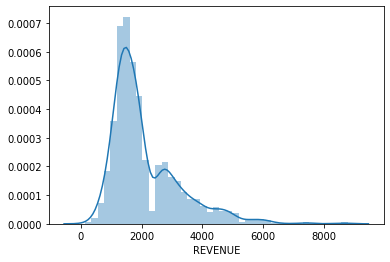

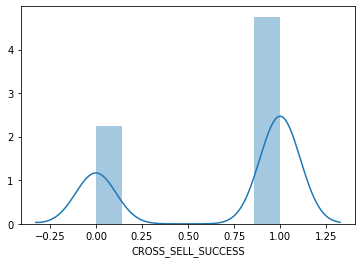

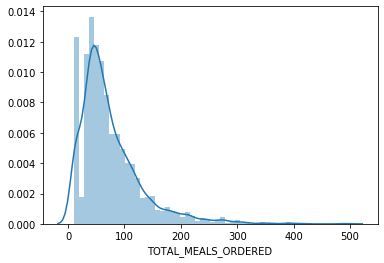

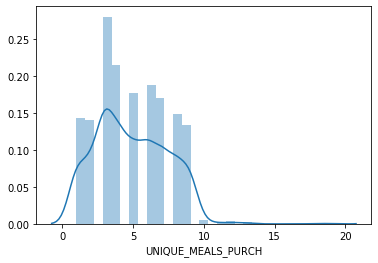

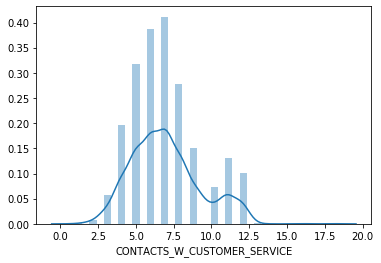

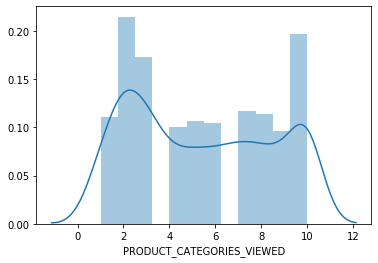

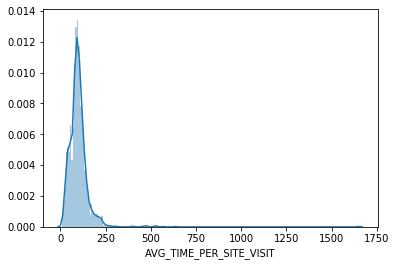

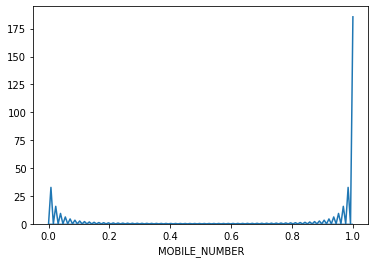

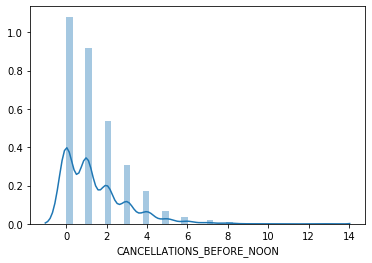

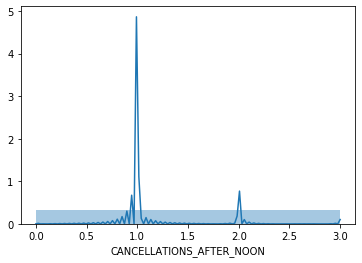

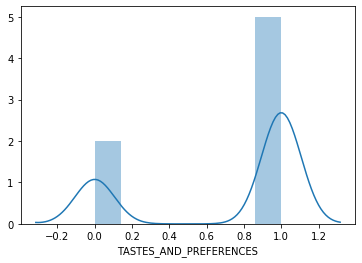

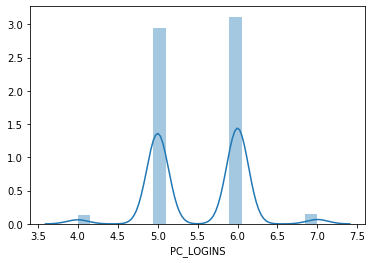

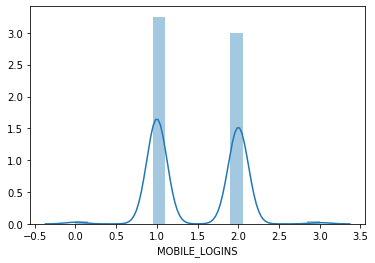

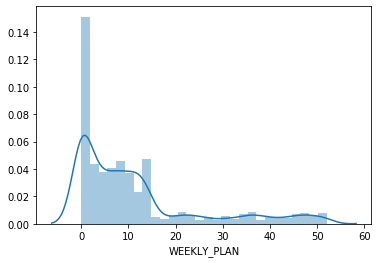

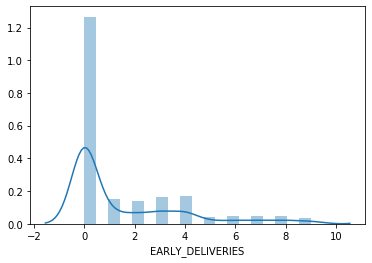

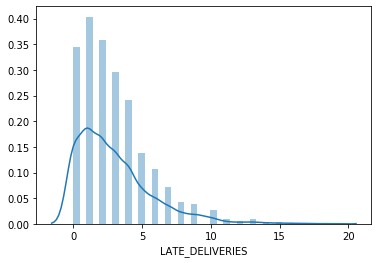

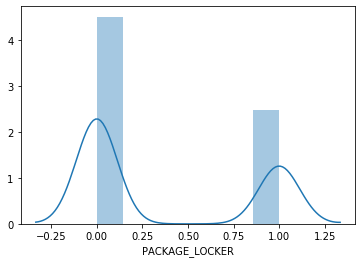

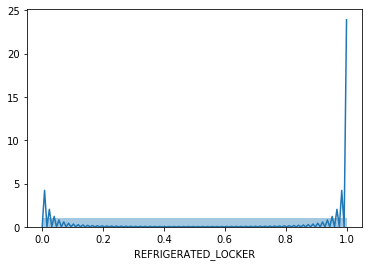

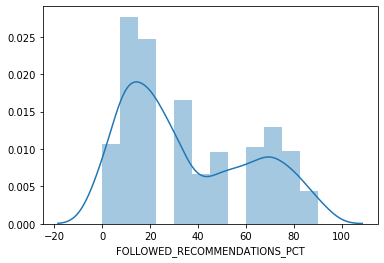

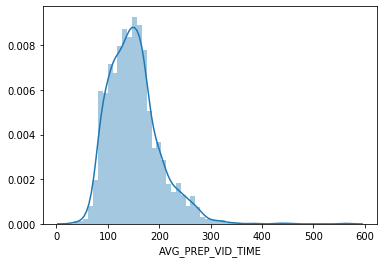

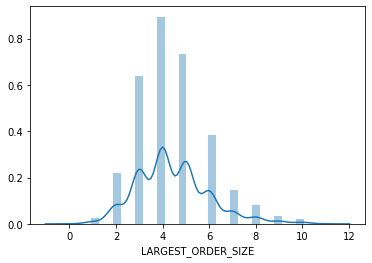

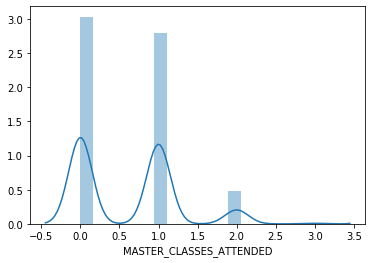

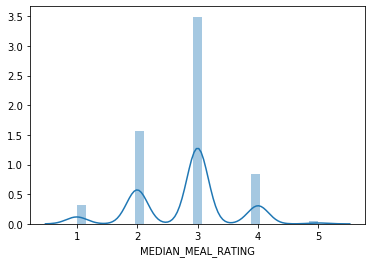

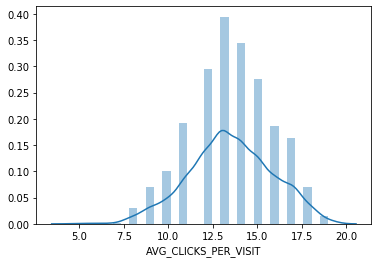

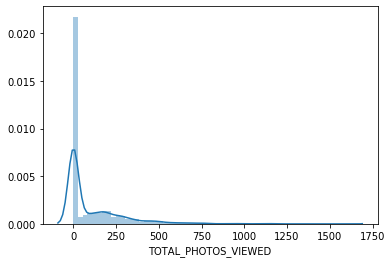

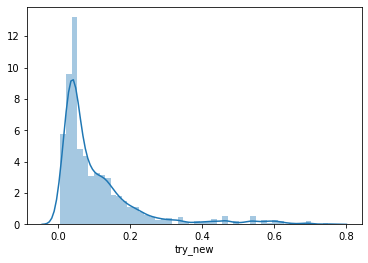

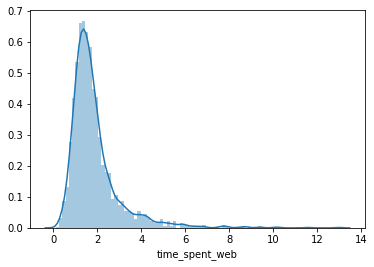

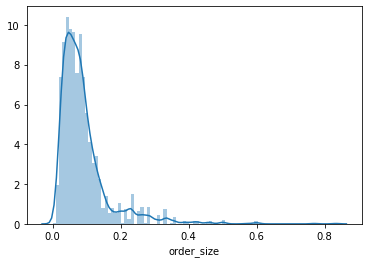

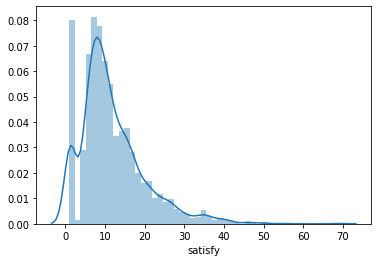

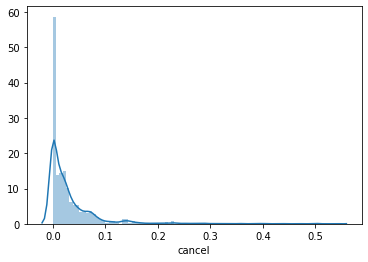

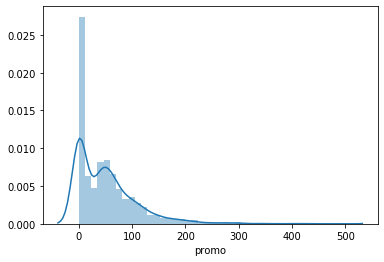

In [22]:
for i in chef_plot:
    sns.distplot(chef[i], bins = 'fd')
    plt.xlabel(i)
    plt.show()

In [23]:
###what hi or low??

product categories viewed are plotted as if they are float in some cases and int in some.


In [11]:
# setting outlier thresholds
total_meal_hi         = 30 
unique_meal_hi        = 10
contacts_customer_lo  = 2.5
contacts_customer_hi  = 12
product_view_lo_1     = 1
product_view_hi_1     = 3.1
product_view_lo_2     = 4
product_view_hi_2     = 6.1
product_view_lo_3     = 7
product_view_hi_3     = 10
time_visit_hi         = 265
cancel_before_noon_hi = 7
pc_login_hi           = 7
weekly_plan_hi        = 20
early_del_hi          = 9
late_del_hi           = 13
flw_recom_hi          = 90
prep_video_time_hi    = 300
prep_video_time_lo    = 50
largest_order_hi      = 10
largest_order_lo      = 1
meal_rating_hi        = 4
click_per_visit_lo    = 8
click_per_visit_hi    = 19
total_photo_hi        = 490
order_size_hi         = 0.31
#check out the revenue
revenue_hi            = 6000



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# total meals ordered
chef['out_total_meal'] = 0
num_hi = chef.loc[0:,'out_total_meal'][chef['TOTAL_MEALS_ORDERED'] > total_meal_hi]

chef['out_total_meal'].replace(to_replace = num_hi,
                                value      = 1,
                                inplace    = True)

# unique meals purchased
chef['out_unique_meal'] = 0
num_hi = chef.loc[0:,'out_unique_meal'][chef['UNIQUE_MEALS_PURCH'] > unique_meal_hi]

chef['out_unique_meal'].replace(to_replace = num_hi,
                                value      = 1,
                                inplace    = True)
# contact customer services
chef['out_contact_customer'] = 0
num_hi = chef.loc[0:,'out_contact_customer'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_customer_hi]
num_lo = chef.loc[0:,'out_contact_customer'][chef['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_customer_lo]

chef['out_contact_customer'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_contact_customer'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)

#product view categories
chef['out_product_view'] = 0
num_hi = chef.loc[0:,'out_product_view'][chef['PRODUCT_CATEGORIES_VIEWED'] > product_view_hi_3]
num_lo = chef.loc[0:,'out_product_view'][chef['PRODUCT_CATEGORIES_VIEWED'] < product_view_lo_1]

chef['out_product_view'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_product_view'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)
# product view category
chef['out_product_view_1'] = 0
num_hi = chef.loc[0:,'out_product_view_1'][chef['PRODUCT_CATEGORIES_VIEWED'] > product_view_hi_2]
num_lo = chef.loc[0:,'out_product_view_1'][chef['PRODUCT_CATEGORIES_VIEWED'] < product_view_lo_3]

chef['out_product_view_1'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_product_view_1'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)

# product view category
chef['out_product_view_2'] = 0
num_hi = chef.loc[0:,'out_product_view_2'][chef['PRODUCT_CATEGORIES_VIEWED'] > product_view_hi_1]
num_lo = chef.loc[0:,'out_product_view_2'][chef['PRODUCT_CATEGORIES_VIEWED'] < product_view_lo_2]

chef['out_product_view_2'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_product_view_2'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)



# Average time per visit on the website
chef['out_time_visit'] = 0
num_hi = chef.loc[0:,'out_time_visit'][chef['AVG_TIME_PER_SITE_VISIT'] > time_visit_hi]

chef['out_time_visit'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)
# cancel before noon
chef['out_cancel_before'] = 0
num_hi = chef.loc[0:,'out_cancel_before'][chef['CANCELLATIONS_BEFORE_NOON'] > cancel_before_noon_hi]

chef['out_cancel_before'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

#pc login

chef['out_pc_login'] = 0
num_hi = chef.loc[0:,'out_pc_login'][chef['PC_LOGINS'] > pc_login_hi]

chef['out_pc_login'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)
#weekly plan subscribed

chef['out_weekly_plan'] = 0
num_hi = chef.loc[0:,'out_weekly_plan'][chef['WEEKLY_PLAN'] > weekly_plan_hi]

chef['out_weekly_plan'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)
#Early delivery
chef['out_early_del'] = 0
num_hi = chef.loc[0:,'out_early_del'][chef['EARLY_DELIVERIES'] > early_del_hi]

chef['out_early_del'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

#late deliveries

chef['out_late_del'] = 0
num_hi = chef.loc[0:,'out_late_del'][chef['LATE_DELIVERIES'] > late_del_hi]

chef['out_late_del'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

#FOLLOWED_RECOMMENDATIONS_PCT

chef['out_flw_recom'] = 0
num_hi = chef.loc[0:,'out_flw_recom'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] > flw_recom_hi]

chef['out_flw_recom'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

# prep video time
chef['out_prep_video'] = 0
num_hi = chef.loc[0:,'out_prep_video'][chef['AVG_PREP_VID_TIME'] > prep_video_time_hi]
num_lo = chef.loc[0:,'out_prep_video'][chef['AVG_PREP_VID_TIME'] < prep_video_time_lo]

chef['out_prep_video'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_prep_video'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)


# largest order size
chef['out_largest_order'] = 0
num_hi = chef.loc[0:,'out_largest_order'][chef['LARGEST_ORDER_SIZE'] > largest_order_hi]
num_lo = chef.loc[0:,'out_largest_order'][chef['LARGEST_ORDER_SIZE'] < largest_order_lo]

chef['out_largest_order'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_largest_order'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)


# Revenue
chef['out_revenue'] = 0
num_hi = chef.loc[0:,'out_revenue'][chef['REVENUE'] > revenue_hi]

chef['out_revenue'].replace(to_replace = num_hi,
                                 value      = 1,
                                 inplace    = True)


#median of meal rating
chef['out_med_meal'] = 0
num_hi = chef.loc[0:,'out_med_meal'][chef['MEDIAN_MEAL_RATING'] > meal_rating_hi]

chef['out_med_meal'].replace(to_replace = num_hi,
                                value      = 1,
                                inplace    = True)

#Average clicks per visit

chef['out_click_visit'] = 0
num_hi = chef.loc[0:,'out_click_visit'][chef['AVG_CLICKS_PER_VISIT'] > click_per_visit_hi]
num_lo = chef.loc[0:,'out_click_visit'][chef['AVG_CLICKS_PER_VISIT'] < click_per_visit_lo]

chef['out_click_visit'].replace(to_replace = num_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_click_visit'].replace(to_replace = num_lo,
                                    value      = 1,
                                    inplace    = True)
#total photos viewed

chef['out_photo_viewed'] = 0
num_hi = chef.loc[0:,'out_photo_viewed'][chef['TOTAL_PHOTOS_VIEWED'] > total_photo_hi]

chef['out_photo_viewed'].replace(to_replace = num_hi,
                                value      = 1,
                                inplace    = True)
#order size

chef['out_order_size'] = 0
num_hi = chef.loc[0:,'out_order_size'][chef['order_size'] > order_size_hi]

chef['out_order_size'].replace(to_replace = num_hi,
                                value      = 1,
                                inplace    = True)


We have developed thresholds for possible outliers. Now, to check the trend, we develope scatterplots for the relations with REVENUE 

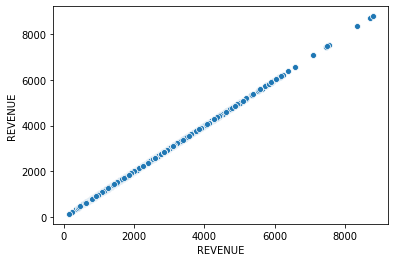

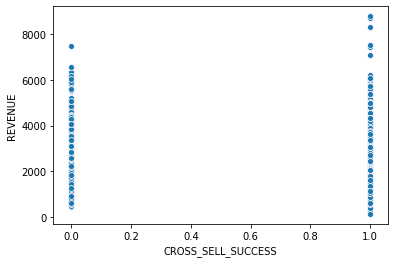

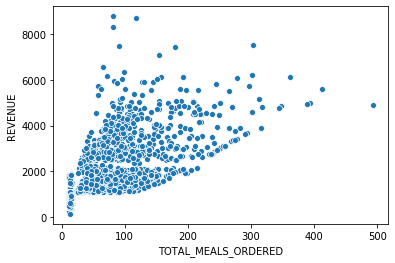

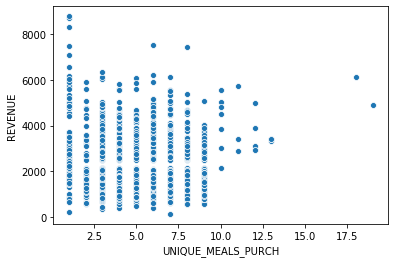

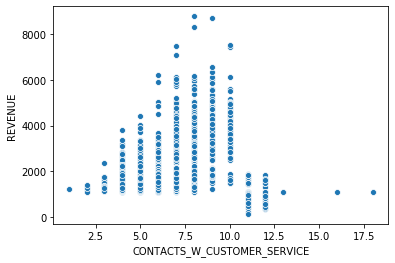

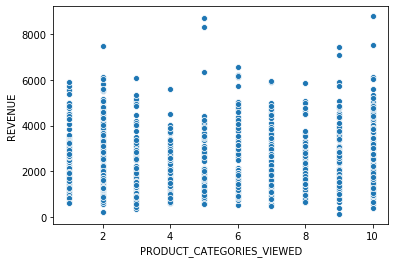

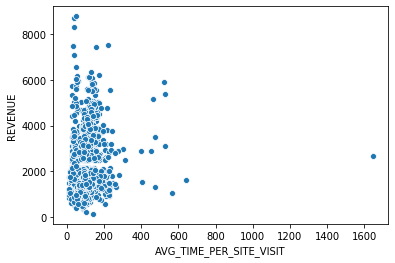

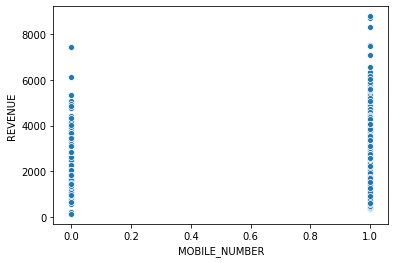

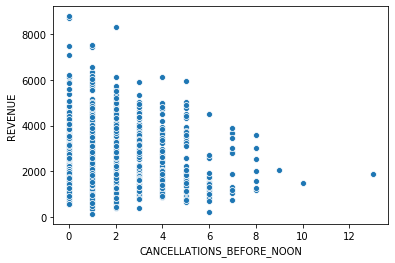

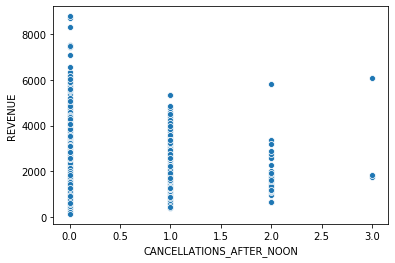

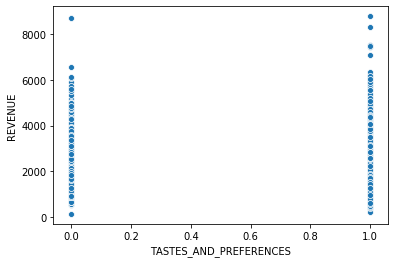

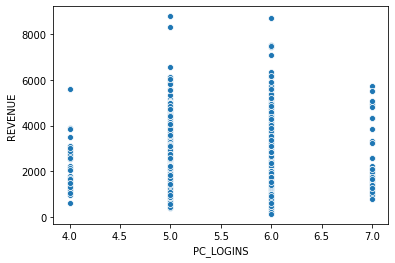

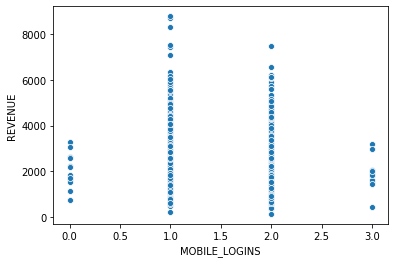

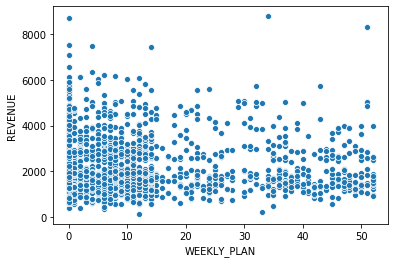

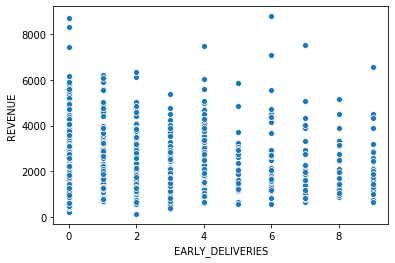

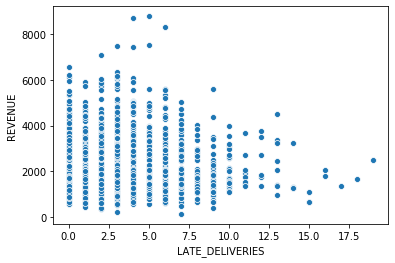

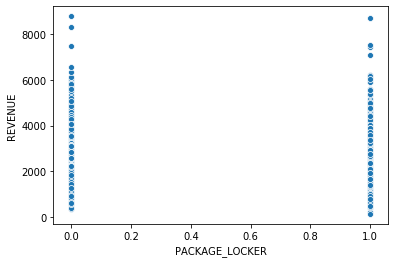

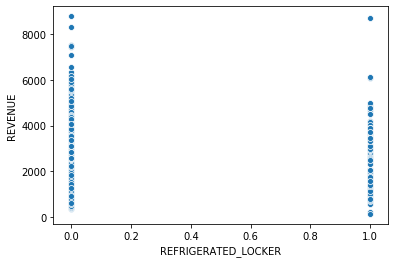

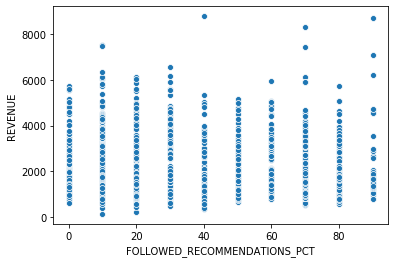

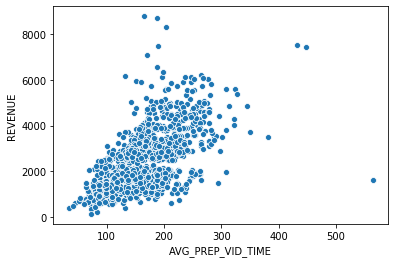

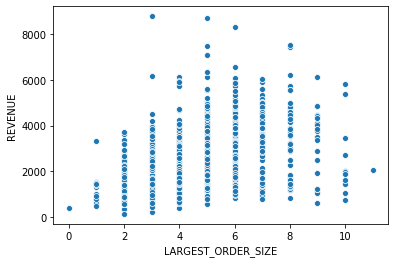

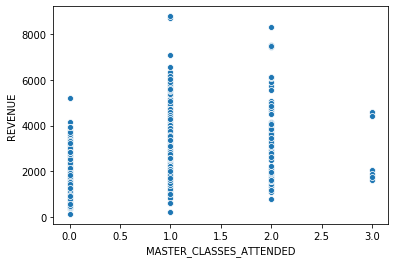

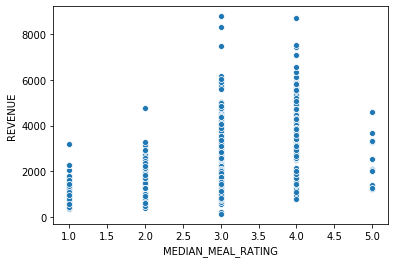

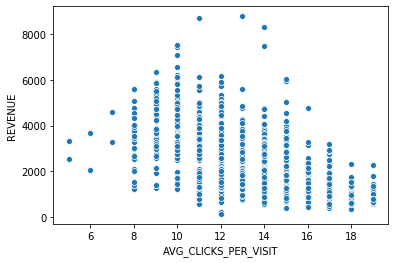

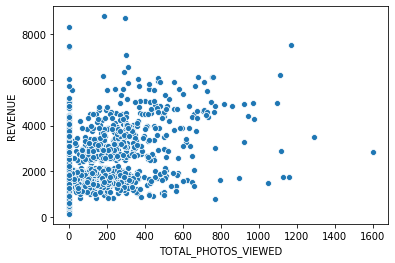

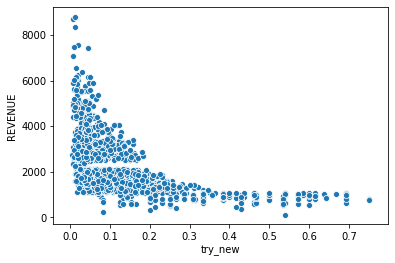

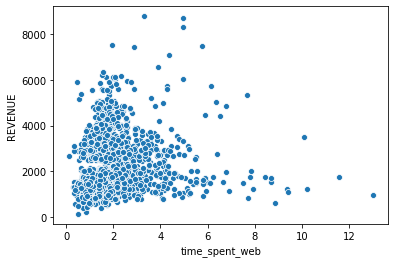

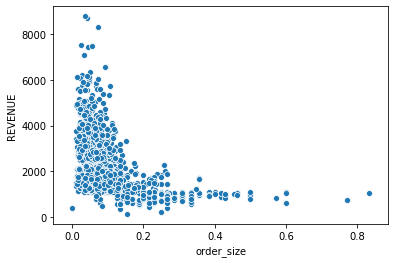

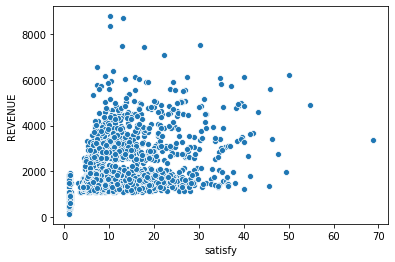

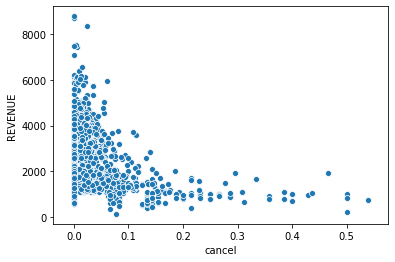

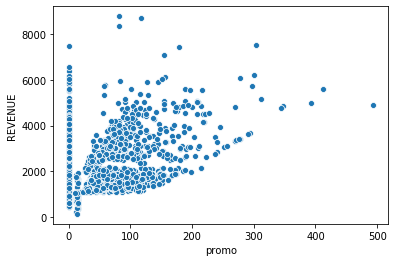

In [25]:
for i in chef_plot:
    sns.scatterplot(x=chef[i], y= chef['REVENUE'])
                                    
    plt.xlabel(i)
    plt.show()

Guide: The ones indicating scattered data are named after 'scatter', note that these ones try to exclude outliers. <br>The ones for trend change are followed by 'change'<br> 
    The ones with inflation in one point are called 'inflate'
    

In [12]:
# setting trend-based thresholds
total_meals_inflate            = 0   # zero inflated
total_meals_scatter            = 300 # data scatters here
contact_w_customer_change      = 10  # trend changes at this point
unique_meals_change            = 10
product_cat_change_1           = 2
product_cat_change_2           = 4
product_cat_change_3           = 5
product_cat_change_4           = 9
time_visit_site_scatter        = 300 
cancel_before_noon_scatter     = 8 
pc_login_change                = 6   
mobile_login_change            = 1
weekly_plan_inflate            = 0
early_del_change               = 4
late_del_change                = 5
flw_recom_change               = 40
video_prep_scatter             = 380
largest_order_change           = 5
master_class_change            = 1
median_meal_change             = 4
click_visit_scatter            = 8
total_photo_inflate            = 0
time_spent_web_scatter         = 7
satisfy_scatter                = 40
cancel_scatter                 = 300
cancel_inflate                 = 0
total_photo_scatter            = 600
promo_inflate                  = 0
promo_scatter                  = 300

Here, we apply the identified outliers or trend changers into the dataset 

In [13]:
##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for outliers

# total meals ordered
chef['change_total_meals_1'] = 0
num = chef.loc[0:,'change_total_meals_1'][chef['TOTAL_MEALS_ORDERED'] == total_meals_inflate]

chef['change_total_meals_1'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

# greater than sign

# total meals ordered (scattered data)
chef['change_total_meals_2'] = 0
num = chef.loc[0:,'change_total_meals_2'][chef['TOTAL_MEALS_ORDERED'] > total_meals_scatter]

chef['change_total_meals_2'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)

# contact with customer services

chef['change_contact_customer'] = 0
num = chef.loc[0:,'change_contact_customer'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > contact_w_customer_change]

chef['change_contact_customer'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)

#changes in unique meals ordered 
chef['change_unique_meal'] = 0
num = chef.loc[0:,'change_unique_meal'][chef['UNIQUE_MEALS_PURCH'] > unique_meals_change]

chef['change_unique_meal'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)





########################################
## change at threshold and inflations           
########################################

# double-equals sign

chef['change_product_1'] = 0
num = chef.loc[0:,'change_product_1'][chef['PRODUCT_CATEGORIES_VIEWED'] == product_cat_change_1]

chef['change_product_1'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
##another trend change
chef['change_product_2'] = 0
num = chef.loc[0:,'change_product_2'][chef['PRODUCT_CATEGORIES_VIEWED'] == product_cat_change_2]

chef['change_product_2'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#another trend change
chef['change_product_3'] = 0
num = chef.loc[0:,'change_product_3'][chef['PRODUCT_CATEGORIES_VIEWED'] == product_cat_change_3]

chef['change_product_3'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#another trend change
chef['change_product_4'] = 0
num = chef.loc[0:,'change_product_4'][chef['PRODUCT_CATEGORIES_VIEWED'] == product_cat_change_2]

chef['change_product_4'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#changes in average time spend per visit
chef['change_time_visit'] = 0
num = chef.loc[0:,'change_time_visit'][chef['AVG_TIME_PER_SITE_VISIT'] > time_visit_site_scatter]

chef['change_time_visit'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)
#cancellation before noon
chef['change_cancel_before'] = 0
num = chef.loc[0:,'change_cancel_before'][chef['CANCELLATIONS_BEFORE_NOON'] > cancel_before_noon_scatter]

chef['change_cancel_before'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)
#pc login
chef['change_pc_login'] = 0
num = chef.loc[0:,'change_pc_login'][chef['PC_LOGINS'] > pc_login_change]

chef['change_pc_login'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)

#mobile logins

chef['change_mobile_login'] = 0
num = chef.loc[0:,'change_mobile_login'][chef['MOBILE_LOGINS'] == mobile_login_change]

chef['change_mobile_login'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

#weekly plan

chef['change_weekly_plan'] = 0
num = chef.loc[0:,'change_weekly_plan'][chef['WEEKLY_PLAN'] == weekly_plan_inflate]

chef['change_weekly_plan'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#Early delivery

chef['change_early_del'] = 0
num = chef.loc[0:,'change_early_del'][chef['EARLY_DELIVERIES'] == early_del_change]

chef['change_early_del'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

#late deliveries

chef['change_late_del'] = 0
num = chef.loc[0:,'change_late_del'][chef['LATE_DELIVERIES'] == late_del_change]

chef['change_late_del'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#follow recommendations
chef['change_flw_recom'] = 0
num = chef.loc[0:,'change_flw_recom'][chef['FOLLOWED_RECOMMENDATIONS_PCT'] == flw_recom_change]

chef['change_flw_recom'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#Average video prep time
chef['change_video_prep'] = 0
num = chef.loc[0:,'change_video_prep'][chef['AVG_PREP_VID_TIME'] > video_prep_scatter]

chef['change_video_prep'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)
#largest order size

chef['change_largest_order'] = 0
num = chef.loc[0:,'change_largest_order'][chef['LARGEST_ORDER_SIZE'] == largest_order_change]

chef['change_largest_order'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

#master classes attended

chef['change_master_class'] = 0
num = chef.loc[0:,'change_master_class'][chef['MASTER_CLASSES_ATTENDED'] == master_class_change]

chef['change_master_class'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

#mediam meal rating

chef['change_med_meal_rate'] = 0
num = chef.loc[0:,'change_med_meal_rate'][chef['MEDIAN_MEAL_RATING'] == median_meal_change]

chef['change_med_meal_rate'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

#average clicks per visit

chef['change_click_visit'] = 0
num = chef.loc[0:,'change_click_visit'][chef['AVG_CLICKS_PER_VISIT'] < click_visit_scatter]

chef['change_click_visit'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)

#total photos viewed

chef['change_photo_view'] = 0
num = chef.loc[0:,'change_photo_view'][chef['TOTAL_PHOTOS_VIEWED'] == total_photo_inflate]

chef['change_photo_view'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#total photo viewed
chef['change_photo_view_1'] = 0
num = chef.loc[0:,'change_photo_view_1'][chef['TOTAL_PHOTOS_VIEWED'] > total_photo_scatter]

chef['change_photo_view_1'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)
# time spent on web (scattered data)
chef['change_time_spent_web'] = 0
num = chef.loc[0:,'change_time_spent_web'][chef['time_spent_web'] > time_spent_web_scatter]

chef['change_time_spent_web'].replace(to_replace = num,
                                   value      = 1,
                                   inplace    = True)
# cancel column engineering

chef['change_cancel_1'] = 0
num = chef.loc[0:,'change_cancel_1'][chef['cancel'] == cancel_inflate]

chef['change_cancel_1'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
#cancel column engineering for scattered data

chef['change_cancel_2'] = 0
num = chef.loc[0:,'change_cancel_2'][chef['cancel'] > cancel_scatter]

chef['change_cancel_2'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
# satisfy column for scatter
chef['change_satisfy'] = 0
num = chef.loc[0:,'change_satisfy'][chef['satisfy'] > satisfy_scatter]

chef['change_satisfy'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
 
# promo column for inflation

chef['change_promo_1'] = 0
num = chef.loc[0:,'change_promo_1'][chef['promo'] == promo_inflate]

chef['change_promo_1'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)
# promo column for scatter and outliers
chef['change_promo_2'] = 0
num = chef.loc[0:,'change_promo_1'][chef['promo'] > promo_scatter]

chef['change_promo_2'].replace(to_replace = num,
                                     value      = 1,
                                     inplace    = True)

Above is carefully created based on scatter plots and anomalies like:<br>
Changes in trend <br>
Inflations <br>
When scatters are less accumulated (tracking outliers)

In [14]:
#analyzing the email addresses
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
emails_df = pd.DataFrame(placeholder_lst)


# displaying the results
emails_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


Adding a column to analyze the domain of custommers' email addresses.Infromation could be regarding where can we concentrate our advertisements or reach outs

In [15]:

# renaming column to concatenate
emails_df.columns= ['name_in_email' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
chef = pd.concat([chef, emails_df['email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
merck.com            28
jnj.com              28
cocacola.com         28
nike.com             27
apple.com            27
dupont.com           26
ge.org               26
ibm.com              26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
caterpillar.com      22
verizon.com          22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
unitedtech.com       18
cisco.com            18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

__without creating separate lists for each functionality, we understand that for instance many of our customers work at American Express; meaning we can focus more on them to retain and even lunch a referral program for the employees there. 
Also, we can see most of people use their personal email addresses.__

In [16]:
professional = ['mmm.com','amex.com','apple.com','boeing.com','caterpillar.com',
'chevron.com','cisco.com',
'cocacola.com','disney.com','dupont.com','exxon.com','ge.org','goldmansacs.com',
'homedepot.com','ibm.com','intel.com','jnj.com','jpmorgan.com','mcdonalds.com',
'merck.com','microsoft.com','nike.com','pfizer.com','pg.com','travelers.com',
'unitedtech.com','unitedhealth.com','verizon.com','visa.com','walmart.com']
personal  = ['gmail.com','yahoo.com','protonmail.com']
junk = ['me.com','aol.com','hotmail.com','live.com','msn.com','passport.com']

#placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if domain in personal:
            placeholder_lst.append('personal')
            
        elif domain in professional :
          placeholder_lst.append('professional')
            
        elif domain in junk :
            placeholder_lst.append('junk')
            
        else:
           print('Unknown')


# joining this to the original DataFrame
chef['domain_class'] = pd.Series(placeholder_lst)

chef['domain_class']

0               junk
1       professional
2           personal
3       professional
4       professional
            ...     
1941        personal
1942        personal
1943        personal
1944        personal
1945            junk
Name: domain_class, Length: 1946, dtype: object

The claim that marketing team has made based on the response rate according to domain was not so effective in my model, so, I comment it out

In [31]:

#import gender_guesser.detector as gender
#placeholder list
#placeholder_lst=[]


#looping to guess gender
#for name in chef['FIRST_NAME']:
    #guess = gender.Detector().get_gender(name)
    #print(guess)
    #placeholder_lst.append(guess)


#converting list into a series
#chef['gender_guess'] = pd.Series(placeholder_lst)


#checking results
#chef.loc[: ,'gender_guess'].value_counts()

The gender guess worked not very properly on this data set. In addition to the fact that it is so time consuming to run, it was not successful to guess most of the names. I have not added any column as a gender guess to my data set since it is not improving my model.
__However, I have counted the values and I have kept the result in here only as a reference to see what gender is buying more contributing to our revenue:<br>
unknown          1385 <br>
male              381 <br>
female            125 <br>
mostly_male        24 <br>
mostly_female      21 <br>
andy               10 <br>
Name: gender_guess, dtype: int64__

In [17]:
#one-hot-encoding on domain class to change the categorical type
one_hot_domain       = pd.get_dummies(chef['domain_class'])
chef = chef.drop('domain_class',axis=1)
chef = chef.join([one_hot_domain])

In [33]:
chef.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,time_spent_web,try_new,order_size,satisfy,cancel,rate_result,login_total,promo,out_total_meal,out_unique_meal,out_contact_customer,out_product_view,out_product_view_1,out_product_view_2,out_time_visit,out_cancel_before,out_pc_login,out_weekly_plan,out_early_del,out_late_del,out_flw_recom,out_prep_video,out_largest_order,out_revenue,out_med_meal,out_click_visit,out_photo_viewed,out_order_size,change_total_meals_1,change_total_meals_2,change_contact_customer,change_unique_meal,change_product_1,change_product_2,change_product_3,change_product_4,change_time_visit,change_cancel_before,change_pc_login,change_mobile_login,change_weekly_plan,change_early_del,change_late_del,change_flw_recom,change_video_prep,change_largest_order,change_master_class,change_med_meal_rate,change_click_visit,change_photo_view,change_photo_view_1,change_time_spent_web,change_cancel_1,change_cancel_2,change_satisfy,change_promo_1,change_promo_2,email_domain,junk,personal,professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,1.927907,0.033898,0.050847,16.857143,0.016949,9,8,118,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,passport.com,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,1.198248,0.068182,0.090909,7.333333,0.000000,3,7,44,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,jnj.com,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,1.717241,0.026316,0.078947,7.600000,0.131579,15,8,38,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,gmail.com,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,2.746649,0.039474,0.039474,9.500000,0.039474,9,7,76,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ibm.com,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,1.276415,0.046154,0.046154,10.833333,0.015385,6,8,65,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,goldmansacs.com,0,0,1


In [18]:
chef.to_excel('chef_featured.xlsx')

In [19]:
chef_data   = chef.drop(['REVENUE', 'NAME','FAMILY_NAME','FIRST_NAME','EMAIL','email_domain',
                         'out_revenue','promo','change_cancel_2','change_cancel_1',
                         'cancel','rate_result','MOBILE_NUMBER','change_late_del',
                         'out_product_view_1','out_product_view_2','out_time_visit',
                         'AVG_CLICKS_PER_VISIT','change_time_visit','change_promo_1',
                        'junk', 'change_click_visit','change_promo_2', 'change_largest_order',
                        'out_click_visit', 'change_flw_recom','FOLLOWED_RECOMMENDATIONS_PCT',
                      'try_new','PRODUCT_CATEGORIES_VIEWED', 'out_total_meal',
                         'out_product_view', 'out_flw_recom','out_unique_meal','out_largest_order',
                         'out_pc_login','out_early_del','professional','out_late_del',
                      'LATE_DELIVERIES'
                        
                        
                       ],
                              axis =1)


# preparing response variable data
chef_target = chef.loc[:,'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
           chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 51)
(1459,)
(487, 51)
(487,)


In [36]:
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'time_spent_web', 'try_new', 'order_size', 'satisfy', 'cancel', 'rate_result', 'login_total', 'promo', 'out_total_meal', 'out_unique_meal', 'out_contact_customer', 'out_product_view', 'out_product_view_1', 'out_product_view_2', 'out_time_visit', 'out_cancel_before', 'out_pc_login', 'out_weekly_plan', 'out_early_del', 'out_late_del', 'out_flw_recom', 'out_prep_video',
       'out_larg

In the following part, I will determine the X train (the data that feeds the training model)

In [37]:
x_variable = ['REVENUE', 'CROSS_SELL_SUCCESS', 
             'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
              'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
              'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
              'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
              'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
              'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
              'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
              'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
              'time_spent_web', 'try_new', 'order_size', 'satisfy', 'cancel', 
              'rate_result', 'login_total', 'promo', 'out_total_meal', 'out_unique_meal',
              'out_contact_customer', 'out_product_view', 'out_product_view_1', 
              'out_product_view_2', 'out_time_visit', 'out_cancel_before', 
              'out_pc_login', 'out_weekly_plan', 'out_early_del', 'out_late_del',
              'out_flw_recom', 'out_prep_video', 'out_largest_order',
              'out_revenue', 'out_med_meal', 'out_click_visit', 'out_photo_viewed', 
              'out_order_size', 'change_total_meals_1', 'change_total_meals_2',
              'change_contact_customer', 'change_unique_meal', 'change_product_1', 
              'change_product_2', 'change_product_3', 'change_product_4',
              'change_time_visit', 'change_cancel_before', 'change_pc_login', 
              'change_mobile_login', 'change_weekly_plan', 'change_early_del',
              'change_late_del', 'change_flw_recom', 'change_video_prep',
              'change_largest_order', 'change_master_class', 'change_med_meal_rate',
              'change_click_visit', 'change_photo_view', 'change_photo_view_1',
              'change_time_spent_web', 'change_cancel_1', 'change_cancel_2',
              'change_satisfy', 'change_promo_1', 'change_promo_2', 
              'junk', 'personal', 'professional']
# looping to make x-variables suitable for statsmodels
for val in x_variable:
    print(f"chef_train['{val}'] +")

chef_train['REVENUE'] +
chef_train['CROSS_SELL_SUCCESS'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['UNIQUE_MEALS_PURCH'] +
chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['PRODUCT_CATEGORIES_VIEWED'] +
chef_train['AVG_TIME_PER_SITE_VISIT'] +
chef_train['MOBILE_NUMBER'] +
chef_train['CANCELLATIONS_BEFORE_NOON'] +
chef_train['CANCELLATIONS_AFTER_NOON'] +
chef_train['TASTES_AND_PREFERENCES'] +
chef_train['PC_LOGINS'] +
chef_train['MOBILE_LOGINS'] +
chef_train['WEEKLY_PLAN'] +
chef_train['EARLY_DELIVERIES'] +
chef_train['LATE_DELIVERIES'] +
chef_train['PACKAGE_LOCKER'] +
chef_train['REFRIGERATED_LOCKER'] +
chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_train['AVG_PREP_VID_TIME'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['MEDIAN_MEAL_RATING'] +
chef_train['AVG_CLICKS_PER_VISIT'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['time_spent_web'] +
chef_train['try_new'] +
chef_train['order_size'] +
chef_train['satisfy'] +
chef_tra

After this and as a preparation for statsmodel, we remove categorical variables as well as revenue and out_revenue

In [20]:
#using the statsmodel to get the regression 
chef_train = pd.concat([X_train, y_train], axis = 1)
lm_best = smf.ols(formula =  """REVENUE ~ chef_train['CROSS_SELL_SUCCESS'] +
                                          chef_train['TOTAL_MEALS_ORDERED'] +
                                          chef_train['UNIQUE_MEALS_PURCH'] +
                                          chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                        
                                          chef_train['AVG_TIME_PER_SITE_VISIT'] +
                                          
                                          chef_train['CANCELLATIONS_BEFORE_NOON'] +
                                          chef_train['CANCELLATIONS_AFTER_NOON'] +
                                          chef_train['TASTES_AND_PREFERENCES'] +
                                          chef_train['PC_LOGINS'] +
                                          chef_train['MOBILE_LOGINS'] +
                                          chef_train['WEEKLY_PLAN'] +
                                          chef_train['EARLY_DELIVERIES'] +
                                         
                                          chef_train['PACKAGE_LOCKER'] +
                                          chef_train['REFRIGERATED_LOCKER'] +
                                      
                                          chef_train['AVG_PREP_VID_TIME'] +
                                          chef_train['LARGEST_ORDER_SIZE'] +
                                          chef_train['MASTER_CLASSES_ATTENDED'] +
                                          chef_train['MEDIAN_MEAL_RATING'] +
                                         
                                          chef_train['TOTAL_PHOTOS_VIEWED'] +
                                          chef_train['time_spent_web'] +
                                    
                                          chef_train['order_size'] +
                                          chef_train['satisfy'] +
                                        
                                        
                                          chef_train['login_total'] +
                                         
                                        
                                          chef_train['out_contact_customer'] +
                                  
                                         
                                          
                                    
                                          chef_train['out_cancel_before'] +
                                         
                                          chef_train['out_weekly_plan'] +
                                       
                                          
                                       
                                          chef_train['out_prep_video'] +
                                         
                                          chef_train['out_med_meal'] +
                                          
                                          chef_train['out_photo_viewed'] +
                                          chef_train['out_order_size'] +
                                          chef_train['change_total_meals_1'] +
                                          chef_train['change_total_meals_2'] +
                                          chef_train['change_contact_customer'] +
                                          chef_train['change_unique_meal'] +
                                          chef_train['change_product_1'] +
                                          chef_train['change_product_2'] +
                                          chef_train['change_product_3'] +
                                          chef_train['change_product_4'] +
                                         
                                          chef_train['change_cancel_before'] +
                                          chef_train['change_pc_login'] +
                                          chef_train['change_mobile_login'] +
                                          chef_train['change_weekly_plan'] +
                                          chef_train['change_early_del'] +
                                         
                                      
                                          chef_train['change_video_prep'] +
                                          
                                          chef_train['change_master_class'] +
                                          chef_train['change_med_meal_rate'] +
                                         
                                          chef_train['change_photo_view'] +
                                          chef_train['change_photo_view_1'] +
                                          chef_train['change_time_spent_web'] +
                            
                                          
                                          chef_train['change_satisfy'] +
                                       
                                       
                                       
                                          chef_train['personal'] 
                                       



                                """,
                                data = chef_train)


# Step 2: fit the model based on the data
reg_results = lm_best.fit()



# Step 3: analyze the summary output
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     77.94
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:54:47   Log-Likelihood:                -11375.
No. Observations:                1459   AIC:                         2.285e+04
Df Residuals:                    1410   BIC:                         2.311e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -25.7736    303.602     -0.085      0.932    -621.334     569.787
chef_train['CROSS_SELL_SUCCESS']            -42.4803     34.907     -1.217      0.224    -110.955      25.995
chef_train['TOTAL_MEALS_ORDERED']             7.3155      1.337      5.473      0.000       4.693       9.938
chef_train['UNIQUE_MEALS_PURCH']            -49.2966      6.844     -7.202      0.000     -62.723     -35.870
chef_train['CONTACTS_W_CUSTOMER_SERVICE']    40.7122     21.480      1.895      0.058      -1.425      82.849
chef_train['AVG_TIME_PER_SITE_VISIT']         0.2969      0.477      0.622      0.534      -0.640       1.233
chef_train['CANCELLATIONS_BEFORE_NOON']      13.1831     11.235      1.173      0.241      -8.856      35.222
chef_train['CANCELLATIONS_AFTER_NOON']      -35.1907     36.234     -0.971      0.332    -106.268      35.887
chef_train['TASTES_AND_PREFERENCES']         22.3325     35.082      0.637      0.525     -46.486      91.151
chef_train['PC_LOGINS']                     -16.1726     34.345     -0.471      0.638     -83.546      51.201
chef_train['MOBILE_LOGINS']                  54.3800     55.906      0.973      0.331     -55.288     164.048
chef_train['WEEKLY_PLAN']                    -3.5955      2.931     -1.227      0.220      -9.345       2.154
chef_train['EARLY_DELIVERIES']               -9.8248      7.338     -1.339      0.181     -24.220       4.571
chef_train['PACKAGE_LOCKER']                 24.6045     37.856      0.650      0.516     -49.655      98.864
chef_train['REFRIGERATED_LOCKER']           -43.8927     57.510     -0.763      0.445    -156.707      68.922
chef_train['AVG_PREP_VID_TIME']               6.7686      0.777      8.706      0.000       5.244       8.294
chef_train['LARGEST_ORDER_SIZE']            -34.1213     23.118     -1.476      0.140     -79.470      11.227
chef_train['MASTER_CLASSES_ATTENDED']       157.5472     33.258      4.737      0.000      92.306     222.788
chef_train['MEDIAN_MEAL_RATING']            127.4798     34.498      3.695      0.000      59.808     195.152
chef_train['TOTAL_PHOTOS_VIEWED']             0.9881      0.224      4.403      0.000       0.548       1.428
chef_train['time_spent_web']                146.5733     24.226      6.050      0.000      99.051     194.096
chef_train['order_size']                  -2457.8749    637.581     -3.855      0.000   -3708.584   -1207.165
chef_train['satisfy']                       -29.6512      8.761     -3.384      0.001     -46.838     -12.465
chef_train['login_total']                    38.2074     28.856      1.324      0.186     -18.398      94.812
chef_train['out_contact_customer']          264.9116    223.389      1.186      0.236    -173.298     703.121
che

After checking the results of regression, we might want to look at the p-values a as well. <br>However, they are not the final decision makers and it is only good to see the possible noise makers if the story is also telling the same thing. 

removed variables:
   

In [71]:

df_corr_newmodel = chef.corr().round(2)

df_corr_newmodel['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS              1.00
promo                           0.62
FOLLOWED_RECOMMENDATIONS_PCT    0.46
professional                    0.19
change_flw_recom                0.16
CANCELLATIONS_BEFORE_NOON       0.16
rate_result                     0.13
cancel                          0.11
MOBILE_NUMBER                   0.10
TASTES_AND_PREFERENCES          0.08
REFRIGERATED_LOCKER             0.07
change_mobile_login             0.05
change_master_class             0.05
PC_LOGINS                       0.04
MASTER_CLASSES_ATTENDED         0.04
PACKAGE_LOCKER                  0.04
personal                        0.04
change_promo_2                  0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
out_med_meal                    0.03
change_product_3                0.03
MEDIAN_MEAL_RATING              0.03
change_late_del                 0.03
out_total_meal                  0.03
out_cancel_before               0.03
AVG_PREP_VID_TIME               0.03
out_largest_order               0.02
o

# Utilizing appropriate modeling techniques

Starting the models using the scikit-learn 

In [68]:
lr = LinearRegression()


# FITTING to the training data
chef_lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
chef_lr_pred = chef_lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

lr_train_score = lr.score(X_train,y_train).round(4)
lr_test_score  = lr.score(X_test,y_test).round(4)

Training Score: 0.7262
Testing Score: 0.6446


After standardization:<br>
Training Score: 0.8285 <br>
Testing Score: -80447768759.0337<br>
so strange! indicating that I should not go to standardizing for these models, Also, it lowers the score for other models to a level as well.

In [69]:
from sklearn.linear_model import Ridge 
ch_ridge_model = Ridge()

# FITTING the training data
ch_ridge_fit  = ch_ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ch_ridge_pred = ch_ridge_fit.predict(X_test)

print('Training Score:', ch_ridge_model.score(X_train,y_train).round(4))
print('Testing Score:',  ch_ridge_model.score(X_test,y_test).round(4))


# saving scoring data for future use
ridge_train_score = ch_ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ch_ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7253
Testing Score: 0.6443


In [64]:
from sklearn.linear_model import Lasso
ch_lasso_model = Lasso()

# FITTING the training data
ch_lasso_fit = ch_lasso_model.fit(X_train,y_train)


# PREDICTING on new data
ch_lasso_pred = ch_lasso_fit.predict(X_test)

print('Training Score:', ch_lasso_model.score(X_train,y_train).round(4))
print('Testing Score:',  ch_lasso_model.score(X_test,y_test).round(4))


# saving scoring data for future use
lasso_train_score = ch_lasso_model.score(X_train,y_train).round(4)
lasso_test_score  = ch_lasso_model.score(X_test,y_test).round(4)

Training Score: 0.7235
Testing Score: 0.6452


In [70]:
from sklearn.linear_model import ARDRegression
ch_ard_model =ARDRegression()


# FITTING the training data
ch_ard_fit = ch_ard_model.fit(X_train,y_train)


# PREDICTING on new data
ch_ard_pred = ch_ard_fit.predict(X_test)


print('Training Score:', ch_ard_model.score(X_train,y_train).round(4))
print('Testing Score:', ch_ard_model.score(X_test,y_test).round(4))


# saving scoring data for comparison
ard_train_score = ch_ard_model.score(X_train,y_train).round(4)
ard_test_score  = ch_ard_model.score(X_test,y_test).round(4)

Training Score: 0.7217
Testing Score: 0.6488


# compare results to choose the best model

In [249]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_1_compare = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score]}


# converting model_performance into a DataFrame
model_1_compare = pd.DataFrame(model_1_compare)


# sending model results to Excel
model_1_compare.to_excel('model_1_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8285           0.7921
Ridge      0.8283           0.7917
Lasso      0.8266           0.7924
ARD        0.8266           0.7931



Model      Train Score      Test Score <br>
-----      -----------      ----------
OLS        0.7145           0.7145 <br>
Ridge      0.7145           0.6201 <br>
Lasso      0.7128           0.6212 <br>
ARD        0.7102           0.7102 <br>
This is after standardization, meaning: using X_scaled_chef_df instead of chef_data

In [ ]:
# say that it has a serious overfitting

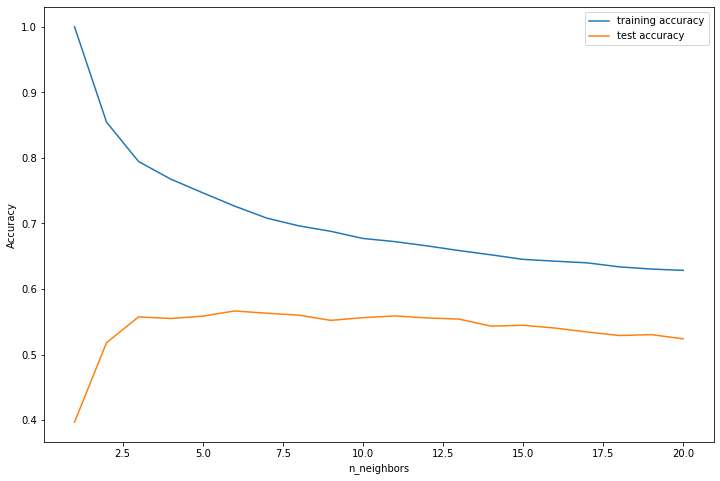

The optimal number of neighbors is 6


In [519]:
from sklearn.neighbors import KNeighborsRegressor 
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [427]:
#before standardization, we form the knn model to compare afterwards

knn_non_st = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 8)


# FITTING to the training data
knn_non_st.fit(X_train, y_train)


# PREDICTING on new data
knn_non_st_pred = knn_non_st.predict(X_test)


# SCORING the results
print('Training Score:', knn_non_st.score(X_train, y_train).round(4))
print('Testing Score:',  knn_non_st.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_non_st_score_train = knn_non_st.score(X_train, y_train).round(4)
knn_non_st_score_test  = knn_non_st.score(X_test, y_test).round(4)

Training Score: 0.7072
Testing Score: 0.5864


In [ ]:
#some notes of standardization

In [520]:
from sklearn.preprocessing import StandardScaler # standard scaler
scaler_chef = StandardScaler()


# FITTING the scaler with the data
scaler_chef.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled_chef = scaler_chef.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_chef_df = pd.DataFrame(X_scaled_chef)


# checking the results for N(0,1)
X_scaled_chef_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.0,0.00,0.00,-0.00,-0.00,-0.00,0.0,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-1.56,-2.62,-1.44,-1.43,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59,-1.48,-1.01,-1.18,-1.31,-0.29,-0.92,-2.45,-0.08,-0.08,-0.09,-0.07,-0.47,0.0,-0.08,-0.10,-0.08,-0.22,-0.16,0.0,-0.08,-0.35,-0.08,-0.44,-0.28,-0.30,-0.28,-0.09,-0.04,-0.15,-1.03,-0.56,-0.30,-0.05,-0.55,-0.89,-0.39,-1.19,-0.09,-2.44,-0.09,-2.53,-0.90,-0.69
25%,-0.64,-0.76,-0.87,-0.78,-0.44,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.57,-0.69,-0.59,-0.63,-0.29,-0.92,0.41,-0.08,-0.08,-0.09,-0.07,-0.47,0.0,-0.08,-0.10,-0.08,-0.22,-0.16,0.0,-0.08,-0.35,-0.08,-0.44,-0.28,-0.30,-0.28,-0.09,-0.04,-0.15,-1.03,-0.56,-0.30,-0.05,-0.55,-0.89,-0.39,-1.19,-0.09,0.41,-0.09,-1.26,-0.90,-0.69
50%,-0.26,0.04,0.01,-0.13,-0.09,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.25,-0.27,-0.25,-0.23,-0.29,-0.29,0.41,-0.08,-0.08,-0.09,-0.07,-0.47,0.0,-0.08,-0.10,-0.08,-0.22,-0.16,0.0,-0.08,-0.35,-0.08,-0.44,-0.28,-0.30,-0.28,-0.09,-0.04,-0.15,0.97,-0.56,-0.30,-0.05,-0.55,-0.89,-0.39,0.84,-0.09,0.41,-0.09,0.01,-0.17,-0.69
75%,0.37,0.84,0.45,0.86,0.28,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,0.47,0.36,0.62,0.27,0.64,0.37,0.21,0.30,0.18,0.44,-0.29,0.34,0.41,-0.08,-0.08,-0.09,-0.07,-0.47,0.0,-0.08,-0.10,-0.08,-0.22,-0.16,0.0,-0.08,-0.35,-0.08,-0.44,-0.28,-0.30,-0.28,-0.09,-0.04,-0.15,0.97,-0.56,-0.30,-0.05,-0.55,1.13,-0.39,0.84,-0.09,0.41,-0.09,1.28,0.43,1.45
max,7.57,5.63,4.83,1.52,24.81,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,8.37,4.23,3.73,2.92,2.35,8.25,9.37,7.32,9.62,6.97,19.48,7.24,0.41,12.70,12.70,10.65,13.91,2.14,0.0,12.70,10.35,12.19,4.51,6.43,0.0,12.19,2.83,12.70,2.28,3.51,3.39,3.51,11.75,25.45,6.57,0.97,1.78,3.38,22.03,1.83,1.13,2.55,0.84,10.98,0.41,10.98,2.55,7.80,1.45


In [521]:
# adding labels to the scaled DataFrame
X_scaled_chef_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_chef_df)}
""")


Dataset BEFORE Scaling
----------------------
TOTAL_MEALS_ORDERED             3057.599946
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
AVG_TIME_PER_SITE_VISIT         3884.497383
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
TASTES_AND_PREFERENCES             0.204082
PC_LOGINS                          0.337105
MOBILE_LOGINS                      0.278218
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
AVG_PREP_VID_TIME               2443.767133
LARGEST_ORDER_SIZE                 2.404278
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT               5.444177
TOTAL_PHOTOS_VIEWED            32749.275410
time_spent_web                     1.415015
try_new                          362.956998
order_size                   

Set up the train and test data using the scaler (change the training data) and running the Knn again for better results.

In [522]:
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_chef_df,
            chef_target,
            test_size = 0.25,
            random_state = 222)

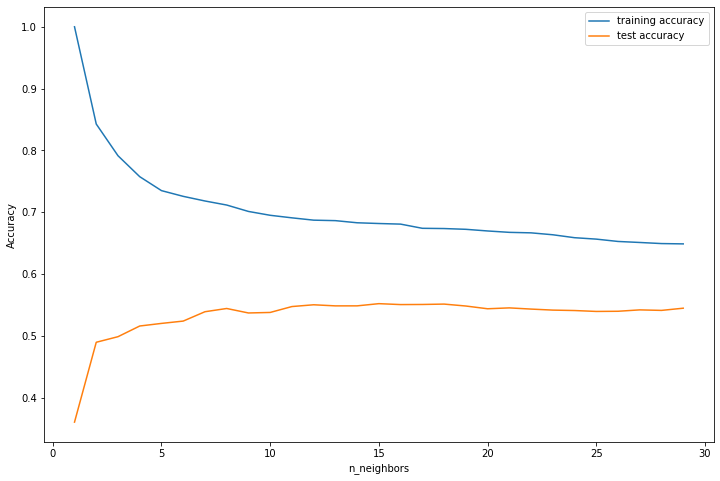

The optimal number of neighbors is 15


In [525]:
#before we use knn, we need the optimal num for neighbors
from sklearn.neighbors import KNeighborsRegressor 
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 30)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [526]:
knn_model = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_model.fit(X_train, y_train)



# PREDITCING on new data
knn_model_pred = knn_model.predict(X_test)



# SCORING the results
print('Training Score:', knn_model.score(X_train, y_train).round(4))
print('Testing Score:',  knn_model.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_model.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_model.score(X_test, y_test).round(4)

Training Score: 0.6818
Testing Score: 0.5522


comparing to the before standard:
Training Score: 0.6756
Testing Score: 0.5418

    There is not a huge difference and interesting is that before standard, is slightly working better!

In [432]:
print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      8             {knn_non_st_score_train}           {knn_non_st_score_test}
Standardized          20             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['KNN_NS_8', 'KNN_NS_20'],
           
                     'Training' : [ knn_non_st_score_train,
                                   knn_stand_score_train],
           
                     'Testing'  : [ knn_non_st_score_test,
                                   knn_stand_score_test]}


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      8             0.7072           0.5864
Standardized          20             0.6676           0.5459



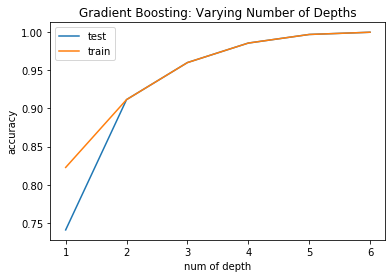

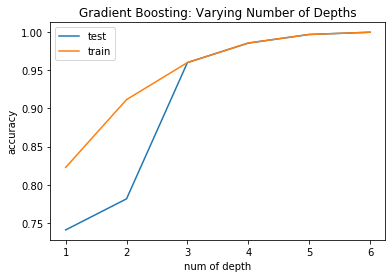

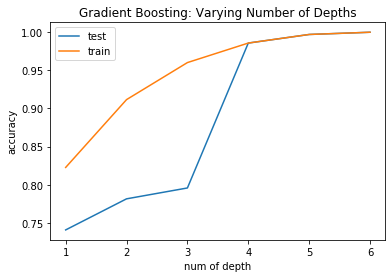

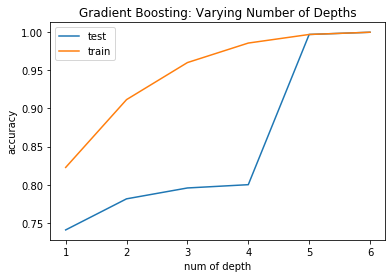

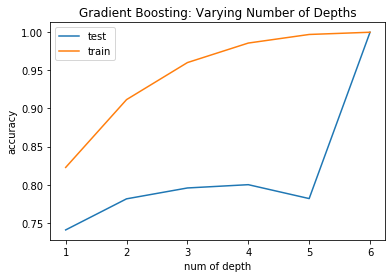

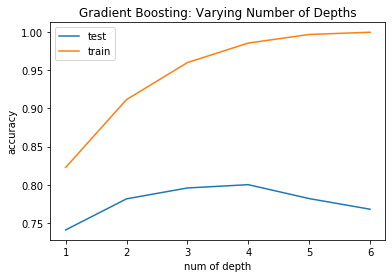

In [529]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
depth=np.arange(1,7)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))
for i,d in enumerate(depth):
    gb = GradientBoostingRegressor(max_depth = d, n_estimators=300, random_state=222)
    gb.fit(X_train,y_train)
    predict=gb.predict(X_test)
    train_accuracy[i]=gb.score(X_train,y_train)
    test_accuracy[i]=gb.score(X_test,y_test)
    plt.title('Gradient Boosting: Varying Number of Depths')
    plt.plot(depth,test_accuracy,label='test')
    plt.plot(depth,train_accuracy,label='train')
    plt.legend()
    plt.xlabel('num of depth')
    plt.ylabel('accuracy')
    plt.show()



Here, we notice that this booster does not help my model, since the R squared is not so high and the overfitting is not low.